In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
train_data_path = 'C:/Users/punit/Downloads/Task 1 Titanic Machine Learning from Disaster/train.csv'
test_data_path = 'C:/Users/punit/Downloads/Task 1 Titanic Machine Learning from Disaster/test.csv'
gender_submission_path = 'C:/Users/punit/Downloads/Task 1 Titanic Machine Learning from Disaster/gender_submission.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
gender_submission = pd.read_csv(gender_submission_path)

In [2]:
# 1. Data Exploration
# Display the first few rows of the training data
print("Training Data Head:")
print(train_data.head())

# Display basic statistics
print("\nTraining Data Info:")
print(train_data.info())

print("\nTraining Data Description:")
print(train_data.describe())


Training Data Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

In [3]:
# Check for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())


Missing Values in Training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


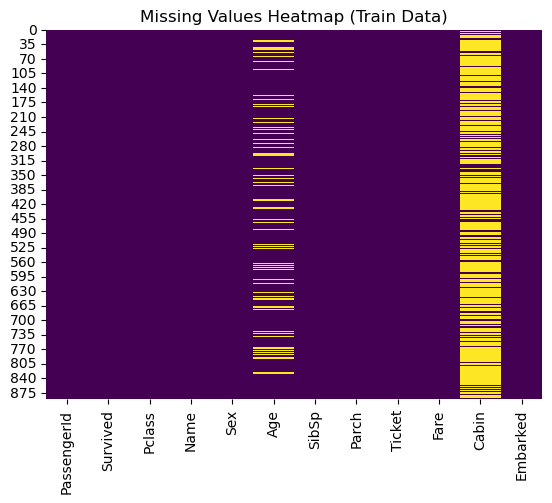

In [4]:
# Visualize missing values
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Train Data)')
plt.show()

In [5]:
# 2. Data Preprocessing
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Convert categorical variables into numerical format
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})



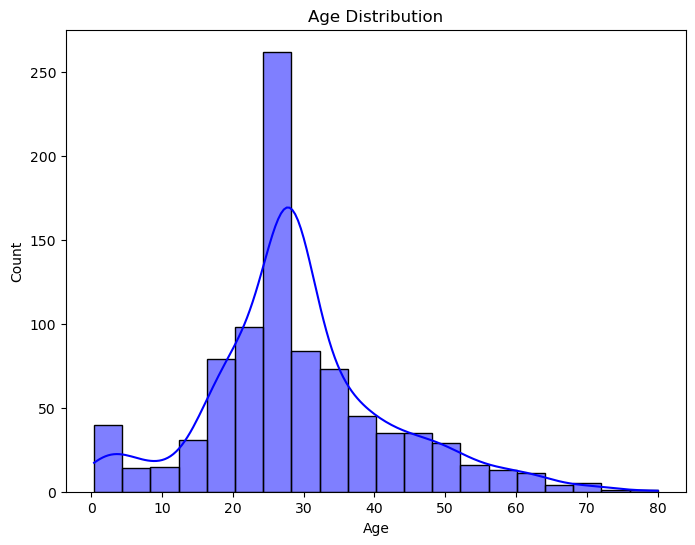

In [6]:
# Histogram for Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

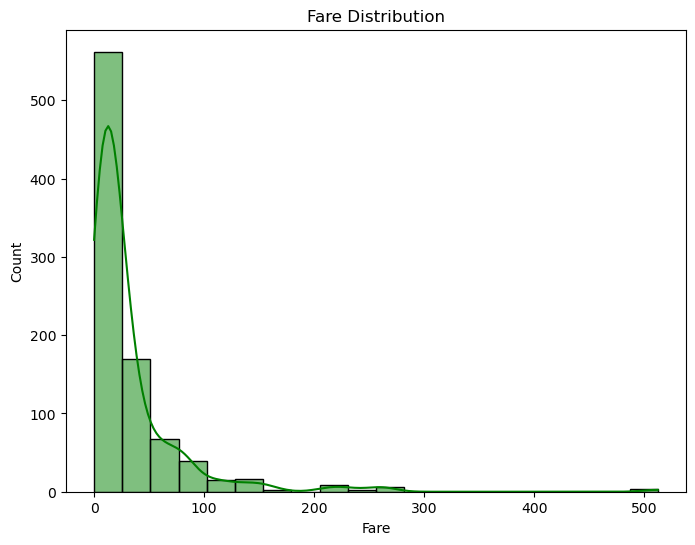

In [7]:
# Histogram for Fare distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Fare'], bins=20, kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

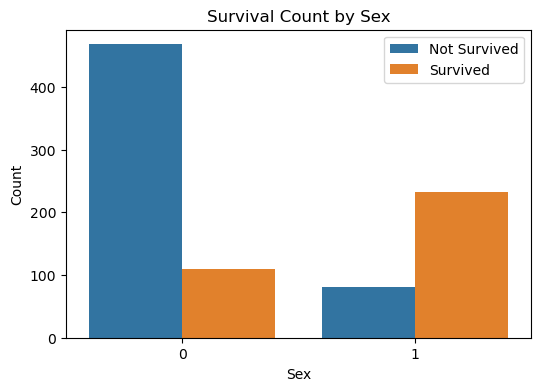

In [8]:
# Count plot for Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

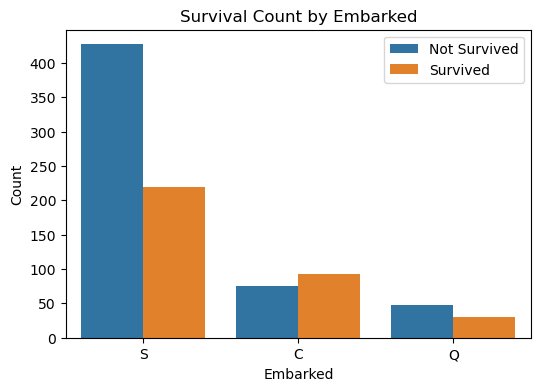

In [9]:
# Count plot for Embarked
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

In [10]:
# One-hot encode 'Embarked' column
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_data.drop(columns=[col for col in columns_to_drop if col in train_data.columns], axis=1, inplace=True)
test_data.drop(columns=[col for col in columns_to_drop if col in test_data.columns], axis=1, inplace=True)

# Align columns in both datasets
expected_columns = list(set(train_data.columns).union(set(test_data.columns)))
for col in expected_columns:
    if col not in train_data.columns:
        train_data[col] = 0
    if col not in test_data.columns:
        test_data[col] = 0

train_data = train_data[expected_columns]
test_data = test_data[expected_columns]

In [11]:
# Define features and target variable for the training dataset
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data

# Split the data into training and validation sets for better evaluation
from sklearn.model_selection import train_test_split
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
# 3. Model Building
# Import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Initialize the models
logreg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42)

# Train the models
logreg.fit(X_train_split, y_train_split)
decision_tree.fit(X_train_split, y_train_split)
random_forest.fit(X_train_split, y_train_split)
gradient_boosting.fit(X_train_split, y_train_split)
svm.fit(X_train_split, y_train_split)

SVC(random_state=42)

In [13]:
# 4. Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the validation set
log_reg_preds = logreg.predict(X_val)
dec_tree_preds = decision_tree.predict(X_val)
rand_forest_preds = random_forest.predict(X_val)
grad_boost_preds = gradient_boosting.predict(X_val)
svm_preds = svm.predict(X_val)

# Define a function to print evaluation metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    return f1

# Evaluate and store F1 scores for each model
f1_scores = {
    "Logistic Regression": evaluate_model(y_val, log_reg_preds, "Logistic Regression"),
    "Decision Tree": evaluate_model(y_val, dec_tree_preds, "Decision Tree"),
    "Random Forest": evaluate_model(y_val, rand_forest_preds, "Random Forest"),
    "Gradient Boosting": evaluate_model(y_val, grad_boost_preds, "Gradient Boosting"),
    "SVM": evaluate_model(y_val, svm_preds, "SVM")
}

# Select the best model based on F1 score
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"\nBest Model: {best_model_name}")


Logistic Regression Evaluation:
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888

Decision Tree Evaluation:
Accuracy: 0.7821229050279329
Precision: 0.7397260273972602
Recall: 0.7297297297297297
F1 Score: 0.7346938775510203

Random Forest Evaluation:
Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1 Score: 0.7586206896551724

Gradient Boosting Evaluation:
Accuracy: 0.8044692737430168
Precision: 0.819672131147541
Recall: 0.6756756756756757
F1 Score: 0.7407407407407408

SVM Evaluation:
Accuracy: 0.6536312849162011
Precision: 0.75
Recall: 0.24324324324324326
F1 Score: 0.3673469387755103

Best Model: Logistic Regression


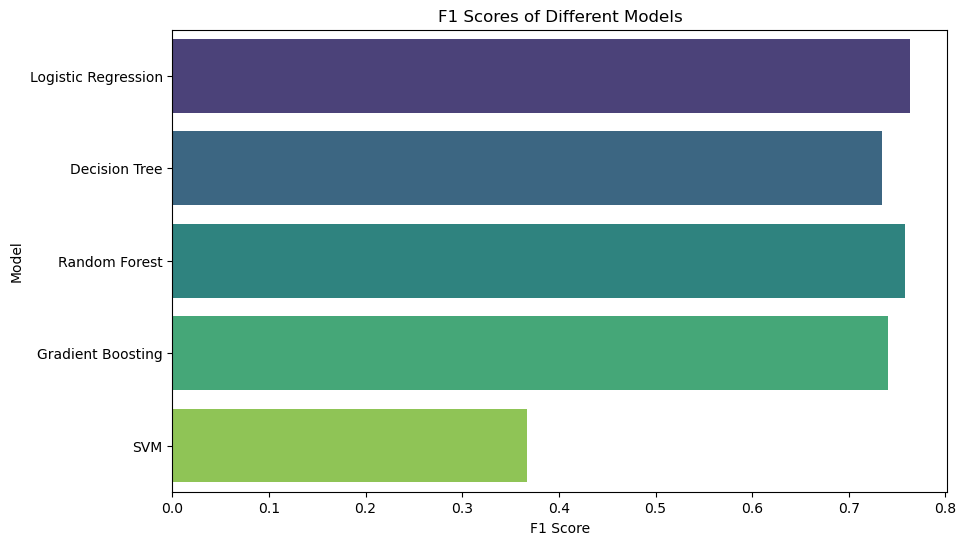

In [14]:
# F1 Scores Bar Plot
f1_scores_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Model', data=f1_scores_df, palette='viridis')
plt.title('F1 Scores of Different Models')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.show()

In [15]:
# 5. Model Tuning for the Best Model
from sklearn.model_selection import GridSearchCV

if best_model_name == "Logistic Regression":
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']  # 'liblinear' supports both L1 and L2 penalties
    }
    model = LogisticRegression(max_iter=1000)
elif best_model_name == "Decision Tree":
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = DecisionTreeClassifier(random_state=42)
elif best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = RandomForestClassifier(random_state=42)
elif best_model_name == "Gradient Boosting":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = GradientBoostingClassifier(random_state=42)
elif best_model_name == "SVM":
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }
    model = SVC(random_state=42)


In [16]:
# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_split, y_train_split)

# Display the best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [17]:
# Train the best model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_split, y_train_split)

# Make predictions on the validation set with the best model
y_val_pred_best = best_model.predict(X_val)

# Evaluate the best tuned model
evaluate_model(y_val, y_val_pred_best, f"Tuned {best_model_name}")


Tuned Logistic Regression Evaluation:
Accuracy: 0.7877094972067039
Precision: 0.7571428571428571
Recall: 0.7162162162162162
F1 Score: 0.736111111111111


0.736111111111111

In [18]:
# Compare the predicted output with real output
comparison_df = pd.DataFrame({'Real': y_val, 'Predicted': y_val_pred_best})
print(comparison_df.head(10))


     Real  Predicted
709     1          0
439     0          0
840     0          0
720     1          1
39      1          1
290     1          1
300     1          1
333     0          0
208     1          1
136     1          1


In [19]:
# Make final predictions on the test set
# Assuming X_train and X_test have different column names or order
# Check and align columns in X_test with X_train
X_test = X_test[X_train.columns]

# Now predict using the aligned X_test
y_test_pred = best_model.predict(X_test)

gender_submission['Survived'] = y_test_pred

In [20]:
# Save the submission file
submission_path = 'C:/Users/punit/Downloads/Task 1 Titanic Machine Learning from Disaster/submission.csv'
gender_submission.to_csv(submission_path, index=False)
print(f"Submission file saved to: {submission_path}")

Submission file saved to: C:/Users/punit/Downloads/Task 1 Titanic Machine Learning from Disaster/submission.csv


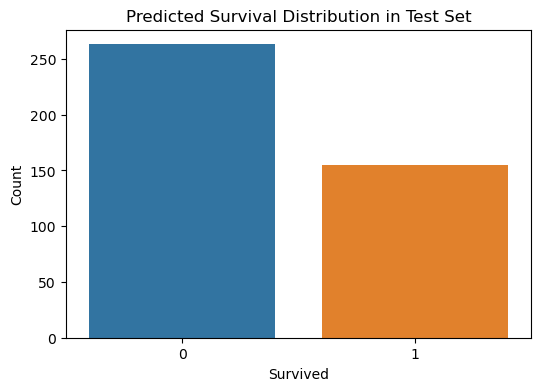

In [21]:
# Count plot for predicted survival in test set
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=gender_submission)
plt.title('Predicted Survival Distribution in Test Set')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()